# Credit card Fraud Detection

Name :- Manoj Kumar Sen

Task 5: Analyzing Credit Card Fraud detection to identify fraudulent credit card transactions

### Importing Libraries

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and
# copy the path for the csv file
data = pd.read_csv("creditcard.csv")


In [3]:
# Grab a peek at the data
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())


(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271

In [5]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [7]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()


Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
print("details of valid transaction")
valid.Amount.describe()


details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### Data Pre-processing

In [9]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### This DataSet is highly inbalanced


In [10]:
# separating the data for analysis
legit = data[data.Class == 0]    # Normal Transaction
fraud = data[data.Class == 1]    # Fraudant Transaction

In [11]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
# compare the values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Undersampling

In [15]:
legit_sample = legit.sample(n=492)

In [16]:
new_data = pd.concat([legit_sample, fraud], axis=0)

In [17]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
199913,133196.0,2.263433,-0.415072,-2.129025,-1.123132,0.285364,-1.106073,0.167217,-0.444836,-1.375786,...,0.398149,1.158780,-0.039817,0.850238,0.466156,0.022343,-0.079925,-0.084022,1.00,0
218088,141166.0,-0.084795,1.028504,-0.848329,-1.241568,1.822071,-0.792281,1.829041,-0.483506,-0.833713,...,0.234541,0.732239,-0.385289,0.127338,0.240713,0.170226,0.089239,0.161959,27.00,0
234679,148068.0,0.140084,1.019986,-1.026839,-0.701670,1.403962,-0.964028,1.466907,-0.495121,-0.436416,...,0.265539,0.843557,-0.164817,0.706369,-0.410918,0.488378,-0.211624,0.097403,0.76,0
234228,147884.0,-3.268831,-0.153355,-1.637582,0.522697,0.275614,-2.271127,-0.225758,0.862383,-0.035460,...,0.118971,1.210442,1.282392,0.314737,-0.124709,-0.103747,0.197122,-0.216651,11.40,0
53434,45973.0,-0.848479,1.371755,1.103045,2.840899,0.413341,-0.125963,0.645188,0.266970,-2.204634,...,-0.273735,-1.136664,0.065151,-0.136409,0.207286,-0.069050,-0.130122,-0.105149,61.79,0


In [18]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [19]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93645.733740,0.080005,-0.056123,-0.043630,0.027277,0.029565,0.006846,0.004972,-0.047054,0.011627,...,-0.046115,0.012094,-0.020661,-0.027363,0.039695,0.001888,-0.031161,-0.031322,0.017925,88.279939
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Exploratory Analysis

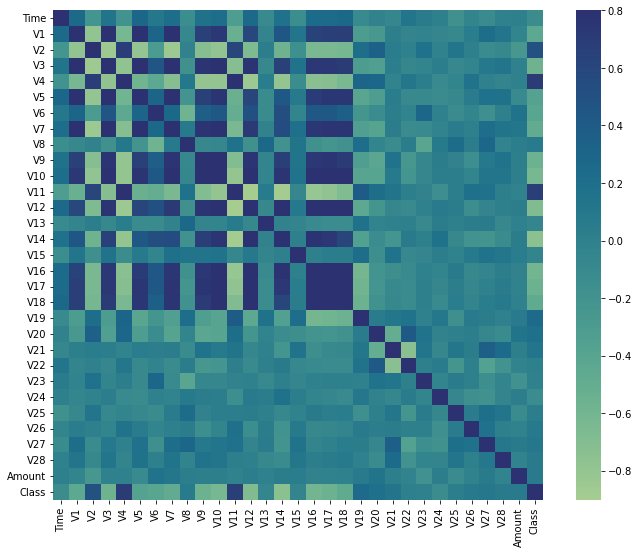

In [20]:
# Correlation matrix
corrmat = new_data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True , cmap="crest")
plt.show()

<AxesSubplot:title={'center':'Class value counts'}>

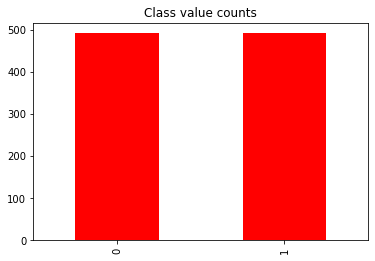

In [21]:
value_counts = new_data['Class'].value_counts()

value_counts.plot.bar(title = 'Class value counts',color='r')

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

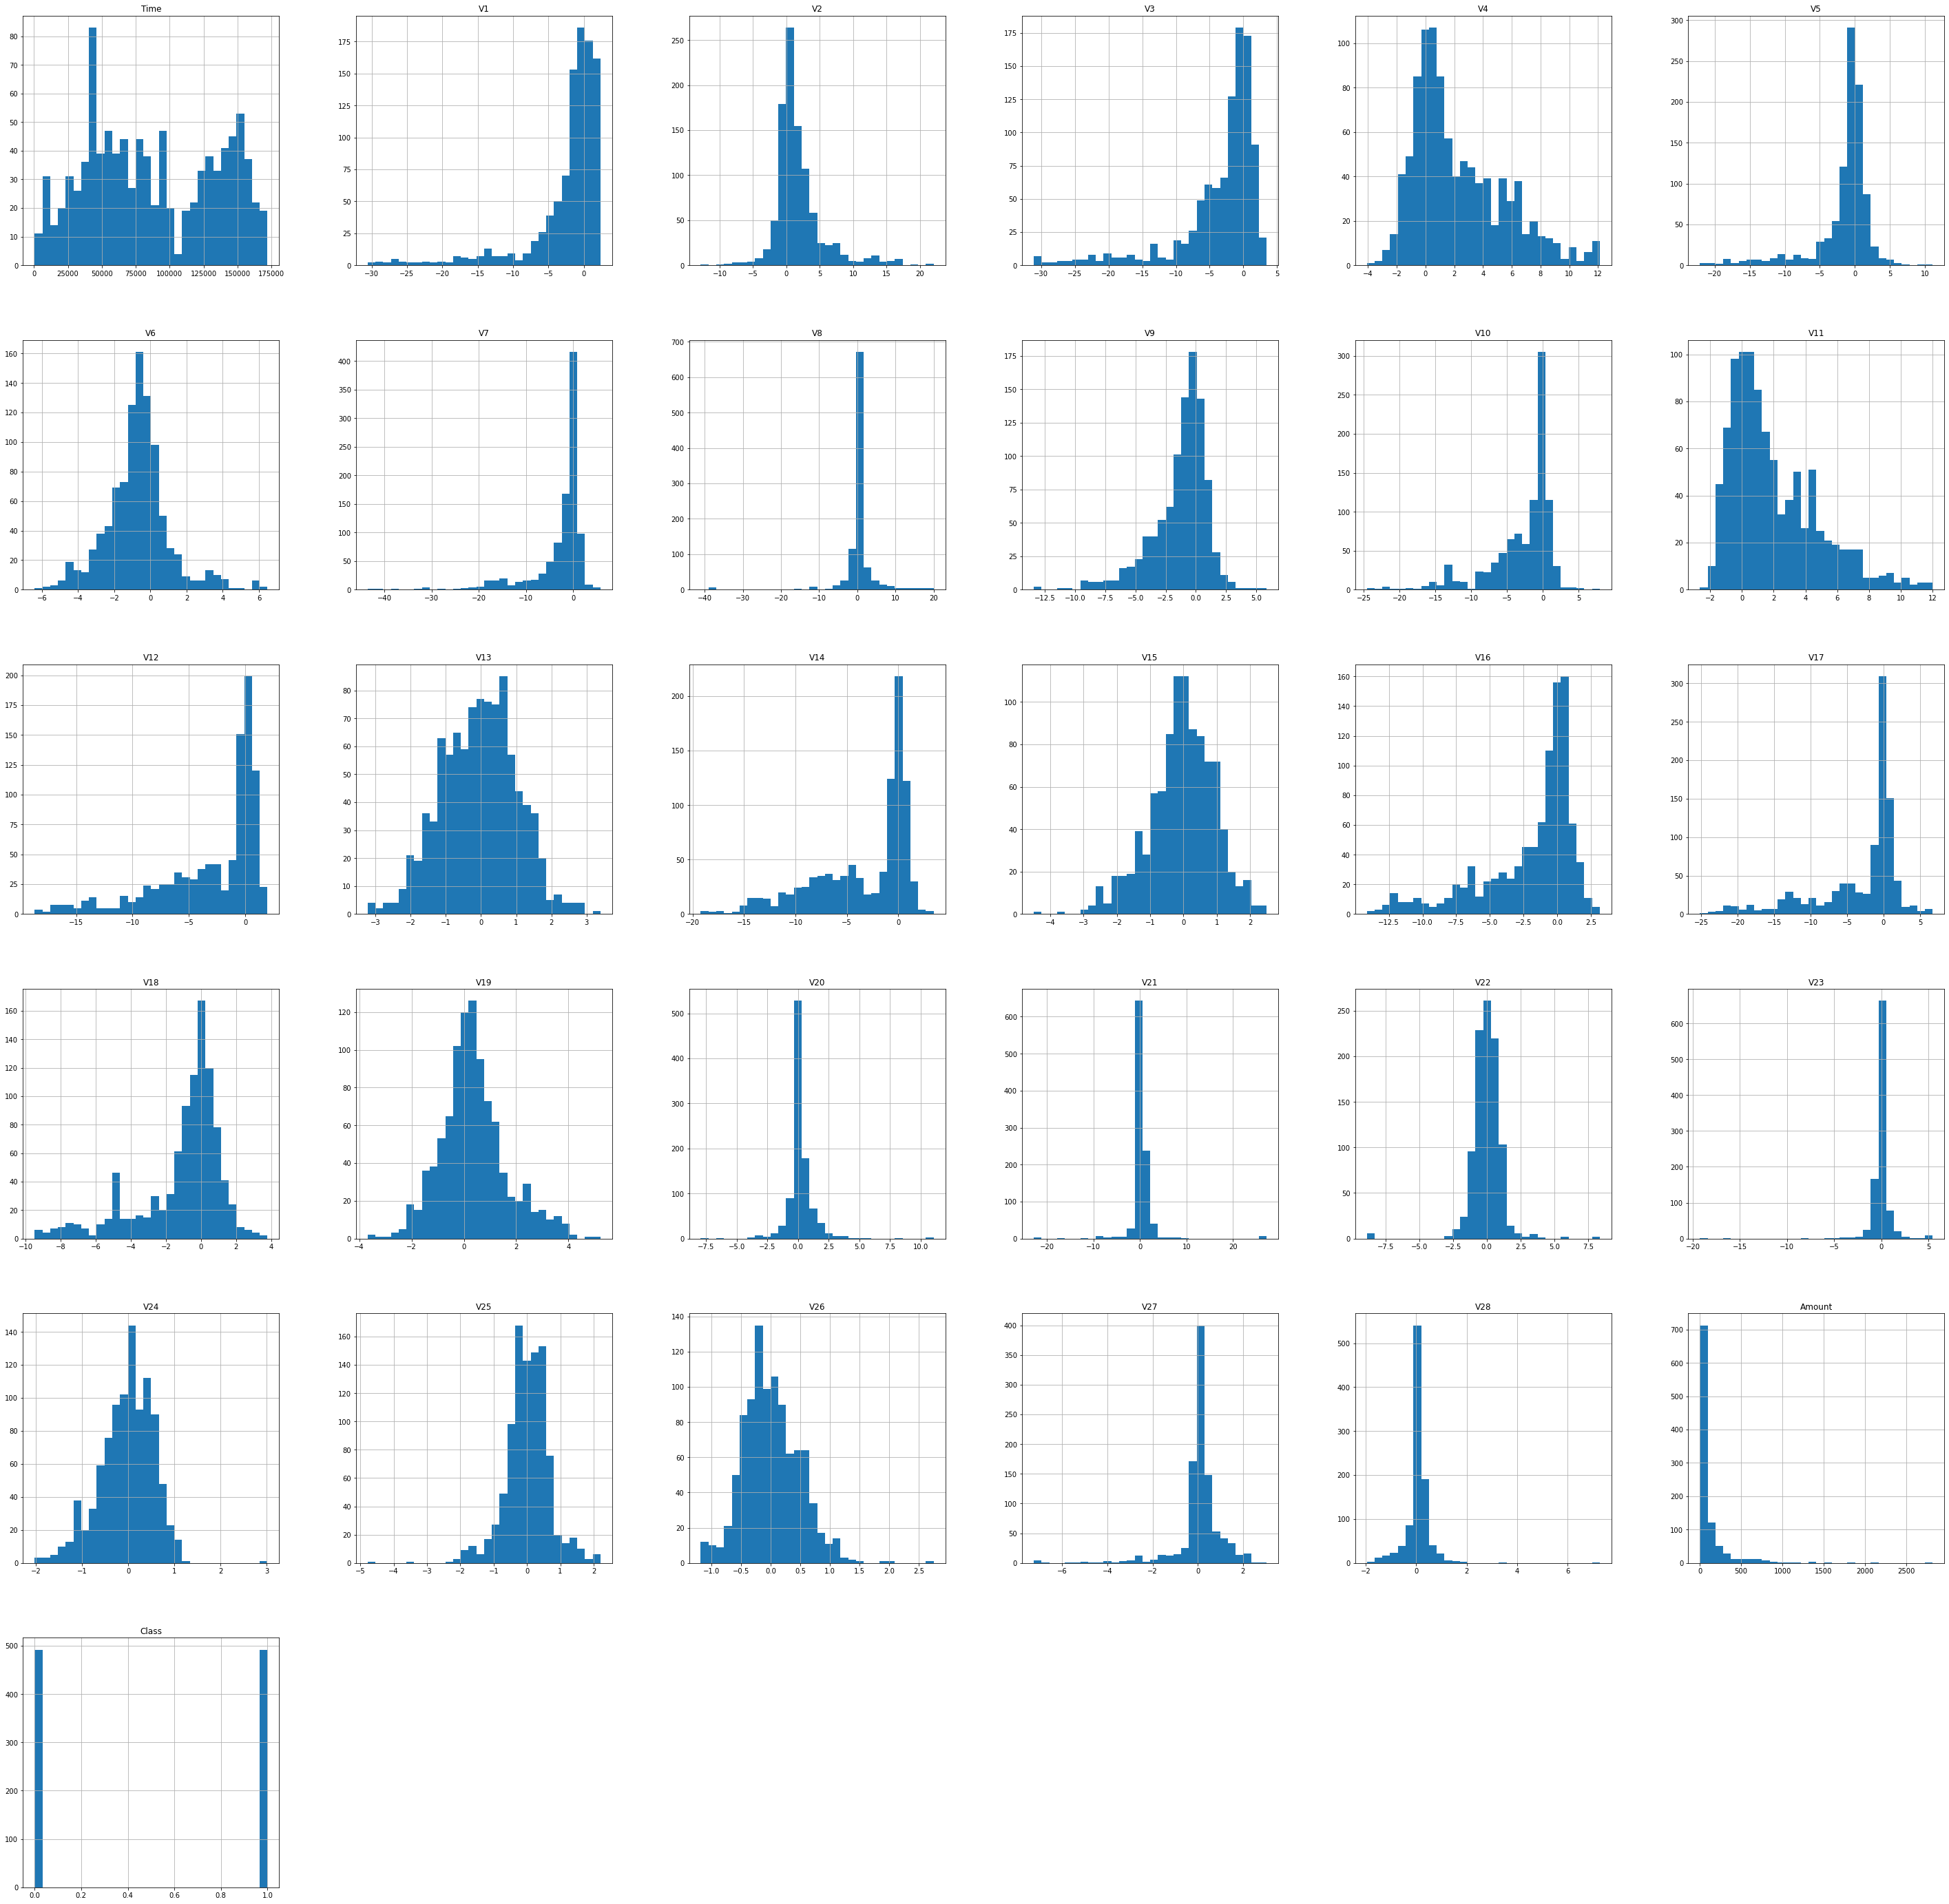

In [22]:
new_data.hist(bins=30, figsize=(50,50))

### Model Building

In [23]:
# dividing the X and the Y from the dataset
X = new_data.drop(['Class'], axis = 1)
Y = new_data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(984, 30)
(984,)


In [24]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

### Logistic Regression model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Linear Regression model
LogR = LogisticRegression()

# Fit the model to the training data
LogR.fit(xTrain, yTrain)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
# Make predictions on the test data
y_predict = LogR.predict(xTest)

# accuracy on training data
x_Train_prediction = LogR.predict(xTrain)
training_data_accuracy = accuracy_score(x_Train_prediction, yTrain)
print('Accuracy on Training data : ', training_data_accuracy)

# accuracy on test data
x_Test_prediction = LogR.predict(xTest)
test_data_accuracy = accuracy_score(x_Test_prediction, yTest)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  0.9377382465057179
Accuracy score on Test Data :  0.9390862944162437


### RandomForest model

In [27]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [28]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {} %".format(acc*100))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{} ".format(MCC))


The model used is Random Forest classifier
The accuracy is 93.4010152284264 %
The precision is 0.956989247311828
The recall is 0.9081632653061225
The F1-Score is 0.9319371727748691
The Matthews correlation coefficient is0.8691039633887908 


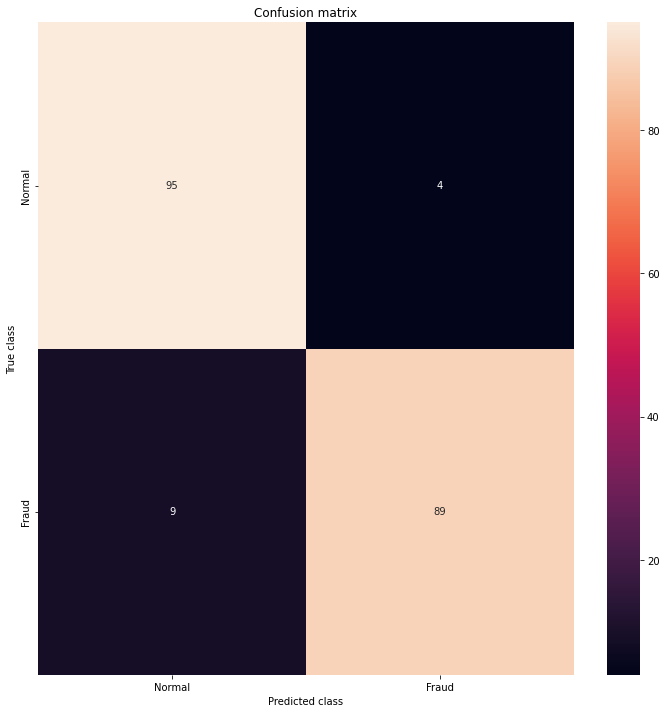

In [29]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Model Deployment

In [30]:
df1=np.array(['1','1.35835406159823','1.34016307473609','1.77320934263119','0.379779593034328','0.503198133318193','1.80049938079263','0.791460956450422','0.247675786588991','1.51465432260583','0.207642865216696','0.624501459424895','0.066083685268831','0.717292731410831','0.165945922763554','2.34586494901581','2.89008319444231','1.10996937869599','0.121359313195888','2.26185709530414','0.524979725224404','0.247998153469754','0.771679401917229','0.909412262347719','0.689280956490685','0.327641833735251','0.139096571514147','0.0553527940384261','0.0597518405929204','378.66'])

In [31]:
df1_2d = np.reshape(df1,(1,-1))

In [32]:
prediction = rfc.predict(df1_2d)
print(prediction)

if(prediction[0]==1):
    print('Fraud Cases')
else:
    print('Valid Transactions')

[0]
Valid Transactions


### Thank You